# CSI 4106 - Introduction to Artificial Intelligence
## Taught by: Dr. Caroline Barrière


## PROJECT 1 - Classification Empirical Study
## Title: Pistachio Classification

### By: Muhammed Melik Izol (300043365), Eric Dam (300012511)
### Group Number: 98

### Dataset used:
https://www.kaggle.com/datasets/muratkokludataset/pistachio-dataset


# Section 1: Understanding the classification for the dataset

## a) Classification Type:
The classification is a Binary Classification since there are 2 categories to classify the pistachios as with the given data. The 2 types of pistachios in this dataset are Kirmizi Pistachios and Siirt Pistachios. 

## b) What is the goal? Is this for a particular application? 
The first goal of this project is to familiarize ourselves with various machine learning methods and learn how to do an Emprical Study on a given dataset. 

The goal in picking this particular dataset was:
- To see the application of data analysis/science and machine learning in farming.  
- To get exposed to image classification on the surface. 

This dataset has provided us with images as well as an excel file with pre-defined features and data on the features of the given images. This has given us the option to pick and choose which we would like to use. We were both interested in image classification but following the advice of Dr. Barrière, we opted to use a dataset where both the features and the images were provided. This way we can see how features and data with numbers are produced from an image without having to do the complex work ourselves. 

In [1]:
# General imports of libraries/packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
import numpy as np
import math

import lightgbm as lgb

In [2]:
# Setting the max number of columns that gets displayed to 30
pd.set_option('display.max_columns', 30)

In [3]:
# reading the dataset
df = pd.read_excel("Pistachio_28_Features_Dataset.xlsx")

# Section 2: Analysis of Dataset

There are two data sets that we can use. One has 28 features available the other has 16 features available. 

We picked the 28 feature data set as it already encompasses the 16 features and colour information on top of it. The 16 feature dataset is missing the RGB/Pixel colour data which may be useful. We can always take out features we don't need if necessary. 

In [4]:
# Seeing what the data looks like
df.head()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Mean_RR,Mean_RG,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,195.9932,180.2673,165.3167,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,222.5941,208.6210,187.3744,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,213.3581,202.9122,187.7118,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,211.8630,205.4264,187.9537,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,229.5648,217.5896,194.4906,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio


### Checking general information of dataframe
- It can be seen that there are no null values and so no missing data in the dataset which is good.

- The dataset has 29 columns in total, numbered 0-28. One of which called "Class" is the classification column. The remaining 28 columns are all features of the dataset. 

- The data type of the features are all float with the exception of "Area" and "Convex_Area" columns, which are int. 

- Looking through the data, it is clear that all the features are continuous

- As mentioned earlier, this is a binary classification since there are only two types of pistachios in the dataset which are Kirmizi Pistachios and Siirt Pistachios. 

- There are a total of 2148 images present in the dataset, each corresponding to one row of data. 

- Out of these 2148 rows of data, 1232 belong to Kirmizi Pistachios and 916 belong to Siirt Pistachios. 

- Kirmizi Pistachios make up about 57.4% of the data and Siirt Pistachios make up about 42.6% of the data, which means our data is imbalanced

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Perimeter      2148 non-null   float64
 2   Major_Axis     2148 non-null   float64
 3   Minor_Axis     2148 non-null   float64
 4   Eccentricity   2148 non-null   float64
 5   Eqdiasq        2148 non-null   float64
 6   Solidity       2148 non-null   float64
 7   Convex_Area    2148 non-null   int64  
 8   Extent         2148 non-null   float64
 9   Aspect_Ratio   2148 non-null   float64
 10  Roundness      2148 non-null   float64
 11  Compactness    2148 non-null   float64
 12  Shapefactor_1  2148 non-null   float64
 13  Shapefactor_2  2148 non-null   float64
 14  Shapefactor_3  2148 non-null   float64
 15  Shapefactor_4  2148 non-null   float64
 16  Mean_RR        2148 non-null   float64
 17  Mean_RG        2148 non-null   float64
 18  Mean_RB 

In [6]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

In [7]:
# Columns that will be our features
FEATURES = ['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB']

# The column we'll be predicting for
TARGET = "Class"

In [8]:
description = df.describe()
description

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Mean_RR,Mean_RG,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,0.569172,0.713077,0.005701,0.003017,0.510461,0.955239,218.067505,207.973008,191.995311,21.380084,22.591454,22.427056,-0.735243,-0.615580,-0.367142,3.054000,2.903015,2.940572
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,0.212760,0.044547,0.000817,0.000340,0.063942,0.051840,10.793178,12.073221,13.030505,3.127813,3.622222,3.926325,0.384584,0.389219,0.426964,0.733993,0.651383,0.750171
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400,167.191300,162.623000,146.787600,10.611100,11.985400,11.197100,-1.931600,-1.658200,-2.348600,1.662400,1.665500,1.522500
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,0.371250,0.681550,0.005200,0.002800,0.464475,0.944000,211.608950,200.437100,182.930675,19.253550,20.036675,19.722425,-0.990900,-0.875975,-0.645800,2.509700,2.437400,2.449425
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,0.643400,0.710700,0.005600,0.003000,0.505150,0.973100,219.529800,208.885000,192.036350,21.425100,22.523250,22.276900,-0.756600,-0.653050,-0.424550,2.941750,2.807050,2.783350
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,0.744125,0.741650,0.006100,0.003200,0.550075,0.987300,225.941500,216.494700,201.097725,23.695900,25.241900,25.140125,-0.502500,-0.405000,-0.158400,3.446500,3.247400,3.224650
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.877900,0.013100,0.005300,0.770600,0.999000,241.275200,240.506500,235.000700,30.838300,33.614600,42.756600,1.865400,2.257600,1.852100,8.890600,10.453900,11.533900


In [9]:
df.loc[df['Class']=='Kirmizi_Pistachio']

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Mean_RR,Mean_RG,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,195.9932,180.2673,165.3167,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,222.5941,208.6210,187.3744,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,213.3581,202.9122,187.7118,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,211.8630,205.4264,187.9537,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,229.5648,217.5896,194.4906,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,53446,1814.176,379.4000,191.5850,0.8631,260.8631,0.8937,59800,0.7345,1.9803,0.2041,0.6876,0.0071,0.0036,0.4727,0.9362,182.3347,166.5466,157.4320,12.7896,14.4923,16.2521,1.4046,1.5741,1.6569,6.8633,7.7662,7.5390,Kirmizi_Pistachio
1228,60008,935.789,351.9654,221.9567,0.7761,276.4138,0.9903,60596,0.7006,1.5857,0.8611,0.7853,0.0059,0.0037,0.6168,0.9780,234.9845,228.4471,204.1450,23.5708,24.7132,23.3880,-1.3742,-1.0818,-0.8024,4.1417,3.6287,3.3141,Kirmizi_Pistachio
1229,60847,1760.171,371.3661,230.1940,0.7847,278.3394,0.8449,72021,0.6548,1.6133,0.2468,0.7495,0.0061,0.0038,0.5618,0.9063,199.6496,186.5368,174.1625,18.7871,20.6093,23.8406,-0.0059,0.2021,0.2321,2.3825,2.5533,3.1973,Kirmizi_Pistachio
1230,82017,2699.074,426.5246,273.5291,0.7673,323.1521,0.8479,96733,0.6657,1.5593,0.1415,0.7576,0.0052,0.0033,0.5740,0.8951,201.3546,185.1882,167.5617,20.1581,22.8757,23.0541,0.0354,0.0576,0.1981,2.1603,2.2605,2.9051,Kirmizi_Pistachio


In [10]:
df.loc[df['Class']=='Siirt_Pistachio']

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Mean_RR,Mean_RG,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
1232,77869,1853.8840,421.2526,240.8186,0.8205,314.8744,0.9544,81591,0.7079,1.7493,0.2847,0.7475,0.0054,0.0031,0.5587,0.9773,228.4509,209.7050,178.1281,25.3395,26.5277,30.5336,-0.7159,-0.6372,-0.6155,2.3924,2.2307,2.6791,Siirt_Pistachio
1233,94948,1184.8521,456.3920,267.6631,0.8100,347.6946,0.9908,95826,0.7605,1.7051,0.8499,0.7618,0.0048,0.0028,0.5804,0.9896,218.5263,199.5023,169.7240,18.6123,17.4126,18.9127,-0.4128,-0.3753,0.0760,3.1365,2.8308,2.8503,Siirt_Pistachio
1234,92639,1792.0270,456.4867,275.1674,0.7979,343.4409,0.9226,100409,0.7494,1.6589,0.3625,0.7524,0.0049,0.0030,0.5660,0.9390,228.3521,211.3281,181.0353,22.2685,21.6097,24.6733,-0.8443,-0.7804,-0.9343,2.8944,2.9480,4.1040,Siirt_Pistachio
1235,84309,1524.9170,442.2157,246.1724,0.8307,327.6363,0.9648,87388,0.7535,1.7964,0.4556,0.7409,0.0052,0.0029,0.5489,0.9861,218.5673,196.4070,169.4727,19.2730,20.4494,19.7311,-0.5847,-0.5965,-0.5324,2.7717,2.6812,2.6696,Siirt_Pistachio
1236,74673,1955.6490,450.7327,237.1064,0.8505,308.3450,0.8704,85791,0.6051,1.9010,0.2454,0.6841,0.0060,0.0032,0.4680,0.8896,228.7432,210.1039,178.2594,20.8304,21.9959,19.1794,-1.0947,-1.1018,-0.8750,3.4917,3.4489,3.1175,Siirt_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,0.0052,0.0029,0.5545,0.9900,217.9821,199.6607,167.9611,20.8474,20.8118,21.1175,-0.6994,-0.7071,-0.6963,2.8853,2.6599,2.6317,Siirt_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,0.0051,0.0033,0.5639,0.8892,213.1749,196.7243,176.5908,21.2621,22.5004,21.5821,-0.5567,-0.4968,-0.6597,2.3022,2.2664,2.5161,Siirt_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,0.0047,0.0027,0.5702,0.9987,220.0782,205.8599,176.3508,21.1262,20.0279,17.4401,-0.9072,-0.8790,-0.4470,3.3112,3.4306,3.0697,Siirt_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,0.0046,0.0028,0.6066,0.9989,221.9399,205.7643,180.9608,19.3274,19.1782,19.8930,-0.9473,-0.8404,-0.3153,3.4237,2.9606,3.0033,Siirt_Pistachio


In [11]:
df['Class'].value_counts()

Kirmizi_Pistachio    1232
Siirt_Pistachio       916
Name: Class, dtype: int64

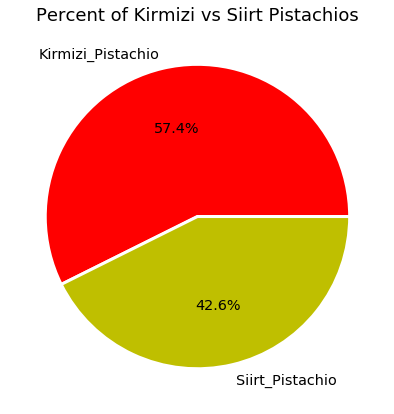

In [12]:
fig, pie_chart = plt.subplots(figsize=(7, 7))
pistachio_labels = df['Class'].unique()
pistachio_counts = df['Class'].value_counts()
colours = ['r', 'y']

pie_chart.pie(pistachio_counts, labels = pistachio_labels, colors = colours, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})

pie_chart.set_title('Percent of Kirmizi vs Siirt Pistachios', fontsize=18)
plt.show()

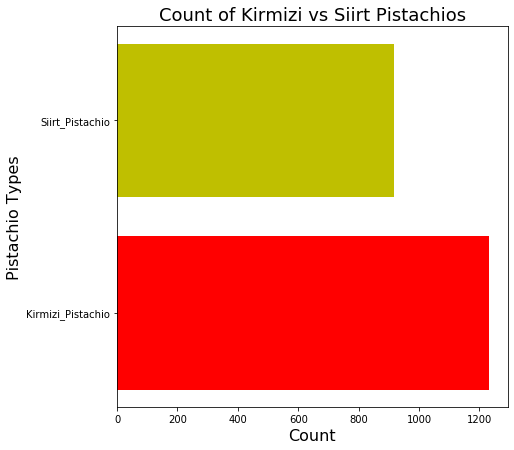

In [13]:
fig, bar_graph = plt.subplots(figsize=(7,7))

pistachio_labels = df['Class'].unique()
pistachio_counts = df['Class'].value_counts()
colours = ['r', 'y']

bar_graph.barh(pistachio_labels, pistachio_counts, label = pistachio_labels, color = colours)

bar_graph.set_ylabel('Pistachio Types', fontsize=16)
bar_graph.set_xlabel('Count', fontsize=16)
bar_graph.set_title('Count of Kirmizi vs Siirt Pistachios', fontsize=18)
plt.show()


# Section 3: Feature Engineering

### We need the definition of each feature. 

- 'Area':  
    The total area in terms of pixels^2


- 'Perimeter' 
    ?


- 'Major_Axis' 
    ?


- 'Minor_Axis' 
    ?


- 'Eccentricity'
    ?


- 'Eqdiasq' 
    ?


- 'Solidity' 
    ?


- 'Convex_Area' 
    ?


- 'Extent' 
    ?


- 'Aspect_Ratio' 
    ?


- 'Roundness' 


- 'Compactness' 


- 'Shapefactor_1' 


- 'Shapefactor_2' 


- 'Shapefactor_3' 


- 'Shapefactor_4' 


- 'Mean_RR':
    The average value of all Red pixels (from 0-255 (R,G,B)) found in the image


- 'Mean_RG' 
    The average value of all Green pixels (from 0-255 (R,G,B)) found in the image


- 'Mean_RB'
    The average value of all Blue pixels (from 0-255 (R,G,B)) found in the image


- 'StdDev_RR' 
    The standard deviation value of Red pixels (from 0-255 (R,G,B)) found in the image


- 'StdDev_RG' 
    The standard deviation value of Green pixels (from 0-255 (R,G,B)) found in the image


- 'StdDev_RB' 
    The standard deviation value of Blue pixels (from 0-255 (R,G,B)) found in the image


- 'Skew_RR' 


- 'Skew_RG' 


- 'Skew_RB'


- 'Kurtosis_RR' 


- 'Kurtosis_RG' 


- 'Kurtosis_RB'


### Attributes that we think will be useful and our reasoning:



INSERT HERE


### Attributes that we think will not be useful and our reasoning


INSERT HERE

# Section 4: Encoding the features 
### Discretizing data 

We need to discretize our data for ML models that do not use continuous data. In order to discretize our data, we need to figure out how to break it down into proper categories. 

For example, we have a feature called "Area". How do we discretize that feature? What would be the best approach to divide "Area" into the correct amount of bins? 

After some research, we found about about the Freedman-Diaconis Rule which states:

bin width = $ \frac{2*IQR}{\sqrt[3]n}$

where n is the size of the data, which will be 2148 in our case. 


Using this, we can then divide (max-min) by the bin width to get number of bins needed to discretize our data.

So, for the "Area" feature we have:

IQR = 79905.500000

n = 2148

max_area = 124008.000000

min_area = 29808.000000

Then, bin width according to Freedman-Diaconis Rule would be:

area_bin_width = 12465.258

and the number of bins needed would be:

(max_area - min_area)/area_bin_width = 7.56 --> round up to 8

In [14]:
def max_min_IQR_size(col):
    # This function takes in a column name and returns 
    # it's max, min, IQR, and size from the description dataFrame
    
    return [description[col]['max'],
    description[col]['min'],
    description[col]['50%'],
    description[col]['count']]


In [15]:
def freedmanDiaconis(cols):
    # This function takes in names of the features (col names)
    # and returns the ideal number of bins it should be
    # grouped into to discretize the data according to the
    # Freedman-Diaconis Rule 
    ## note: we are taking abs of IQR as we cannot have negative bins
    ##       and some IQR values of certain features are negative  
    bins_info = {}
    for col in cols:
        info = max_min_IQR_size(col)
        maximum = info[0]
        minimum = info[1]
        IQR = info[2]
        n = info[3]
        bins_info[col] = math.ceil((maximum-minimum)/(2*abs(IQR)*(n**(-1/3))))
    return bins_info

In [16]:
bins_info = freedmanDiaconis(FEATURES)

In [17]:
def discretizer(cols):
    df_discretized = pd.DataFrame()
    # This function takes a list of columns and creates a new data frame
    # out of them by discretizing the given columns and adding them to 
    # a new data frame
    for col in cols:
        discretized = KBinsDiscretizer(n_bins=bins_info[col], encode='ordinal', strategy='uniform')
        discretized = discretized.fit_transform(df[[col]]).reshape(1,-1)
        df_discretized[col] = discretized[0]
    return df_discretized

In [18]:
df_discretized = discretizer(FEATURES)

In [19]:
# All the features after discretization
df_discretized

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Mean_RR,Mean_RG,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB
0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,0.0,0.0,2.0,2.0,3.0,20.0,23.0,47.0,2.0,3.0,3.0
1,3.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,5.0,4.0,4.0,13.0,13.0,31.0,0.0,1.0,1.0
2,3.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,5.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,11.0,12.0,40.0,4.0,4.0,6.0
3,3.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,5.0,10.0,10.0,23.0,2.0,2.0,3.0
4,4.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,2.0,2.0,0.0,3.0,2.0,2.0,2.0,1.0,4.0,3.0,3.0,8.0,8.0,28.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,4.0,1.0,2.0,3.0,2.0,3.0,2.0,4.0,2.0,2.0,7.0,2.0,1.0,1.0,4.0,2.0,2.0,1.0,0.0,3.0,2.0,3.0,10.0,9.0,25.0,2.0,2.0,2.0
2144,4.0,7.0,2.0,4.0,2.0,3.0,2.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,11.0,11.0,25.0,1.0,1.0,2.0
2145,6.0,2.0,2.0,3.0,2.0,4.0,2.0,5.0,3.0,2.0,7.0,2.0,0.0,0.0,4.0,2.0,2.0,1.0,1.0,3.0,2.0,1.0,8.0,7.0,28.0,3.0,4.0,3.0
2146,5.0,1.0,2.0,3.0,2.0,3.0,2.0,5.0,3.0,1.0,8.0,3.0,0.0,0.0,4.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,8.0,8.0,30.0,3.0,3.0,3.0


# Section 5: Data Preparation and Cross-Validation

Our classification will be a binary classification. 
The 2 classes are "Kirmizi_Pistachio" and "Siirt_Pistachio",

We will change "Kirmizi_Pistachio" to 0 and "Siirt_Pistachio" to 1 for the sake of prediction. 





In [20]:
df['Class'] = (df['Class'].replace("Kirmizi_Pistachio", 0).replace("Siirt_Pistachio", 1))

From our data analysis step, we know that our data is imbalanced. 
57.4% of our data is made up of Kirmizi Pistachios and 42.6% of our data is made up of Siirt Pistachios. 
Moreover, we have a relatively small dataset with only 2148 rows of data.

Based on our findings for imbalanced and small datasets, the suggested method of cross-validation is the Stratified KFold Cross-Validation.


The reason that Stratified KFold Cross-Validation is suggested for imbalanced and small datasets is because it tries to automatically balance the target variable in both the training and the testing data.
ie: "The folds are made by preserving the percentage of samples for each class

In [21]:
X = df[FEATURES]
y = df[TARGET]

X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size = 0.1)

X_discretized_training, X_discretized_testing, y_training, y_testing = train_test_split(df_discretized, y, test_size = 0.1)

In [22]:
# code to visualize Stratified K Fold Split
# link in sources

cmap_data = plt.cm.autumn
cmap_cv = plt.cm.coolwarm


def plot_cv_indices(cv, X, y, ax, n_splits, lw=25):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )


    # Formatting
    yticklabels = list(range(n_splits)) + ["class"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="Fold",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[-50,2200]
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=30)
    return ax


def plot_cv(cv, X, y, n_splits=5):
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(15, 5))
    plot_cv_indices(this_cv, X, y, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.1)), Patch(color = cmap_data(0)), Patch(color = cmap_data(900))],
        ["Testing set", "Training set", "Kirmizi", "Siirt"],
        loc=(1.02, 0.8),
    )
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
    plt.show()
    

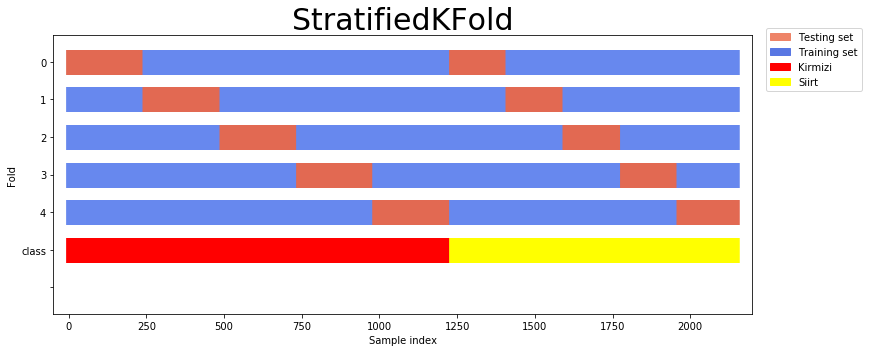

In [23]:
plot_cv(StratifiedKFold, X,y)

In [8]:
#from itertools import chain, combinations

#def powerset(iterable):
#    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
#    s = list(iterable)
#    return chain.from_iterable(combinations(s, r) for r in range(1,len(s)+1))
#powerset_features = list(powerset(FEATURES))

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1)
fold = 0
area_under_the_curve_scores = []
accuracy_scores = []
for train_i, test_i in skf.split(df_discretized, y):
    X_discretized_training = df_discretized.loc[train_i]
    y_training = y.loc[train_i]
    
    X_discretized_testing = df_discretized.loc[test_i]
    y_testing = y.loc[test_i]
    classifier = GaussianNB()
    classifier.fit(X_discretized_training, y_training)
    prediction = classifier.predict(X_discretized_testing)
    prediction_probability = classifier.predict_proba(X_discretized_testing)[:, 1]
    acc_score = accuracy_score(y_testing, prediction)
    area_under_curve_score = roc_auc_score(y_testing, prediction_probability)
    print(f'======= Fold {fold} =======')
    print(f"Accuracy Score is: {acc_score:0.4f}")
    print(f"Area Under Curve Score is: {area_under_curve_score:0.4f}")
    fold +=1
    area_under_the_curve_scores.append(area_under_curve_score)
    accuracy_scores.append(acc_score)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 529)
fold = 0
area_under_the_curve_scores = []
accuracy_scores = []
for train_i, test_i in skf.split(X, y):
    X_training = X.loc[train_i]
    y_training = y.loc[train_i]
    
    X_testing = X.loc[test_i]
    y_testing = y.loc[test_i]
    classifier = lgb.LGBMClassifier(n_estimators = 100)
    classifier.fit(X_training, y_training)
    prediction = classifier.predict(X_testing)
    prediction_probability = classifier.predict_proba(X_testing)[:, 1]
    acc_score = accuracy_score(y_testing, prediction)
    area_under_curve_score = roc_auc_score(y_testing, prediction_probability)
    print(f'======= Fold {fold} =======')
    print(f"Accuracy Score is: {acc_score:0.4f}")
    print(f"Area Under Curve Score is: {area_under_curve_score:0.4f}")
    fold +=1
    area_under_the_curve_scores.append(area_under_curve_score)
    accuracy_scores.append(acc_score)

In [ ]:
area_under_the_curve_scores

In [ ]:
accuracy_scores

In [ ]:
np.mean(area_under_the_curve_scores)

In [ ]:
np.mean(accuracy_scores)



# Section 6: Model Training

Here, we will be training the 3 models requested:
- Naïve Bayes
- Logistic Regression
- Multi-Layer Perceptron

### Part A: Training Naïve Bayes

### Part B: Training Logistic Regression

### Part C: Training Multi-Layer Perceptron

# Section 7: Model Testing

Here, we will be testing the 3 models we trained in the previous section:
- Naïve Bayes
- Logistic Regression
- Multi-Layer Perceptron

### Part A: Testing Naïve Bayes

### Part B: Testing Logistic Regression

### Part C: Testing Multi-Layer Perceptron

# Section 8: Evaluation with Precision/Recall Measures

# Section 9: Section 6-7-8 with Modified Parameters

In this section we will re-do sections 6 through 8 (inclusive) with modified parameters.
The parameters we modified are ____________???
We chose to modify these parameters because ____________???

# Section 10: Results

### Part A: Quantitative Comparison of 9 results

### Part B: Examples of Good and Bad Results

# Sources

### Dataset used:
https://www.kaggle.com/datasets/muratkokludataset/pistachio-dataset


### Citations requested by the owner of the dataset: 

OZKAN IA., KOKLU M. and SARACOGLU R. (2021). Classification of Pistachio Species Using Improved K-NN Classifier. Progress in Nutrition, Vol. 23, N. 2, pp. DOI:10.23751/pn.v23i2.9686. (Open Access) https://www.mattioli1885journals.com/index.php/progressinnutrition/article/view/9686/9178

SINGH D, TASPINAR YS, KURSUN R, CINAR I, KOKLU M, OZKAN IA, LEE H-N., (2022). Classification and Analysis of Pistachio Species with Pre-Trained Deep Learning Models, Electronics, 11 (7), 981. https://doi.org/10.3390/electronics11070981. (Open Access)

### Sources used to calculate bin sized for data discretization:
https://en.wikipedia.org/wiki/Freedman–Diaconis_rule

https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram


### Sources used for Cross Validation:
https://www.youtube.com/watch?v=-8s9KuNo5SA

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html